In [2]:
import os
import itertools
import numpy as np
import pandas as pd
# PyTorch
import torch
import torchvision
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter
plt.rcParams.update({'font.size': 12})

In [3]:
import sys
sys.path.append('../src/')

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import utils as utils
import losses

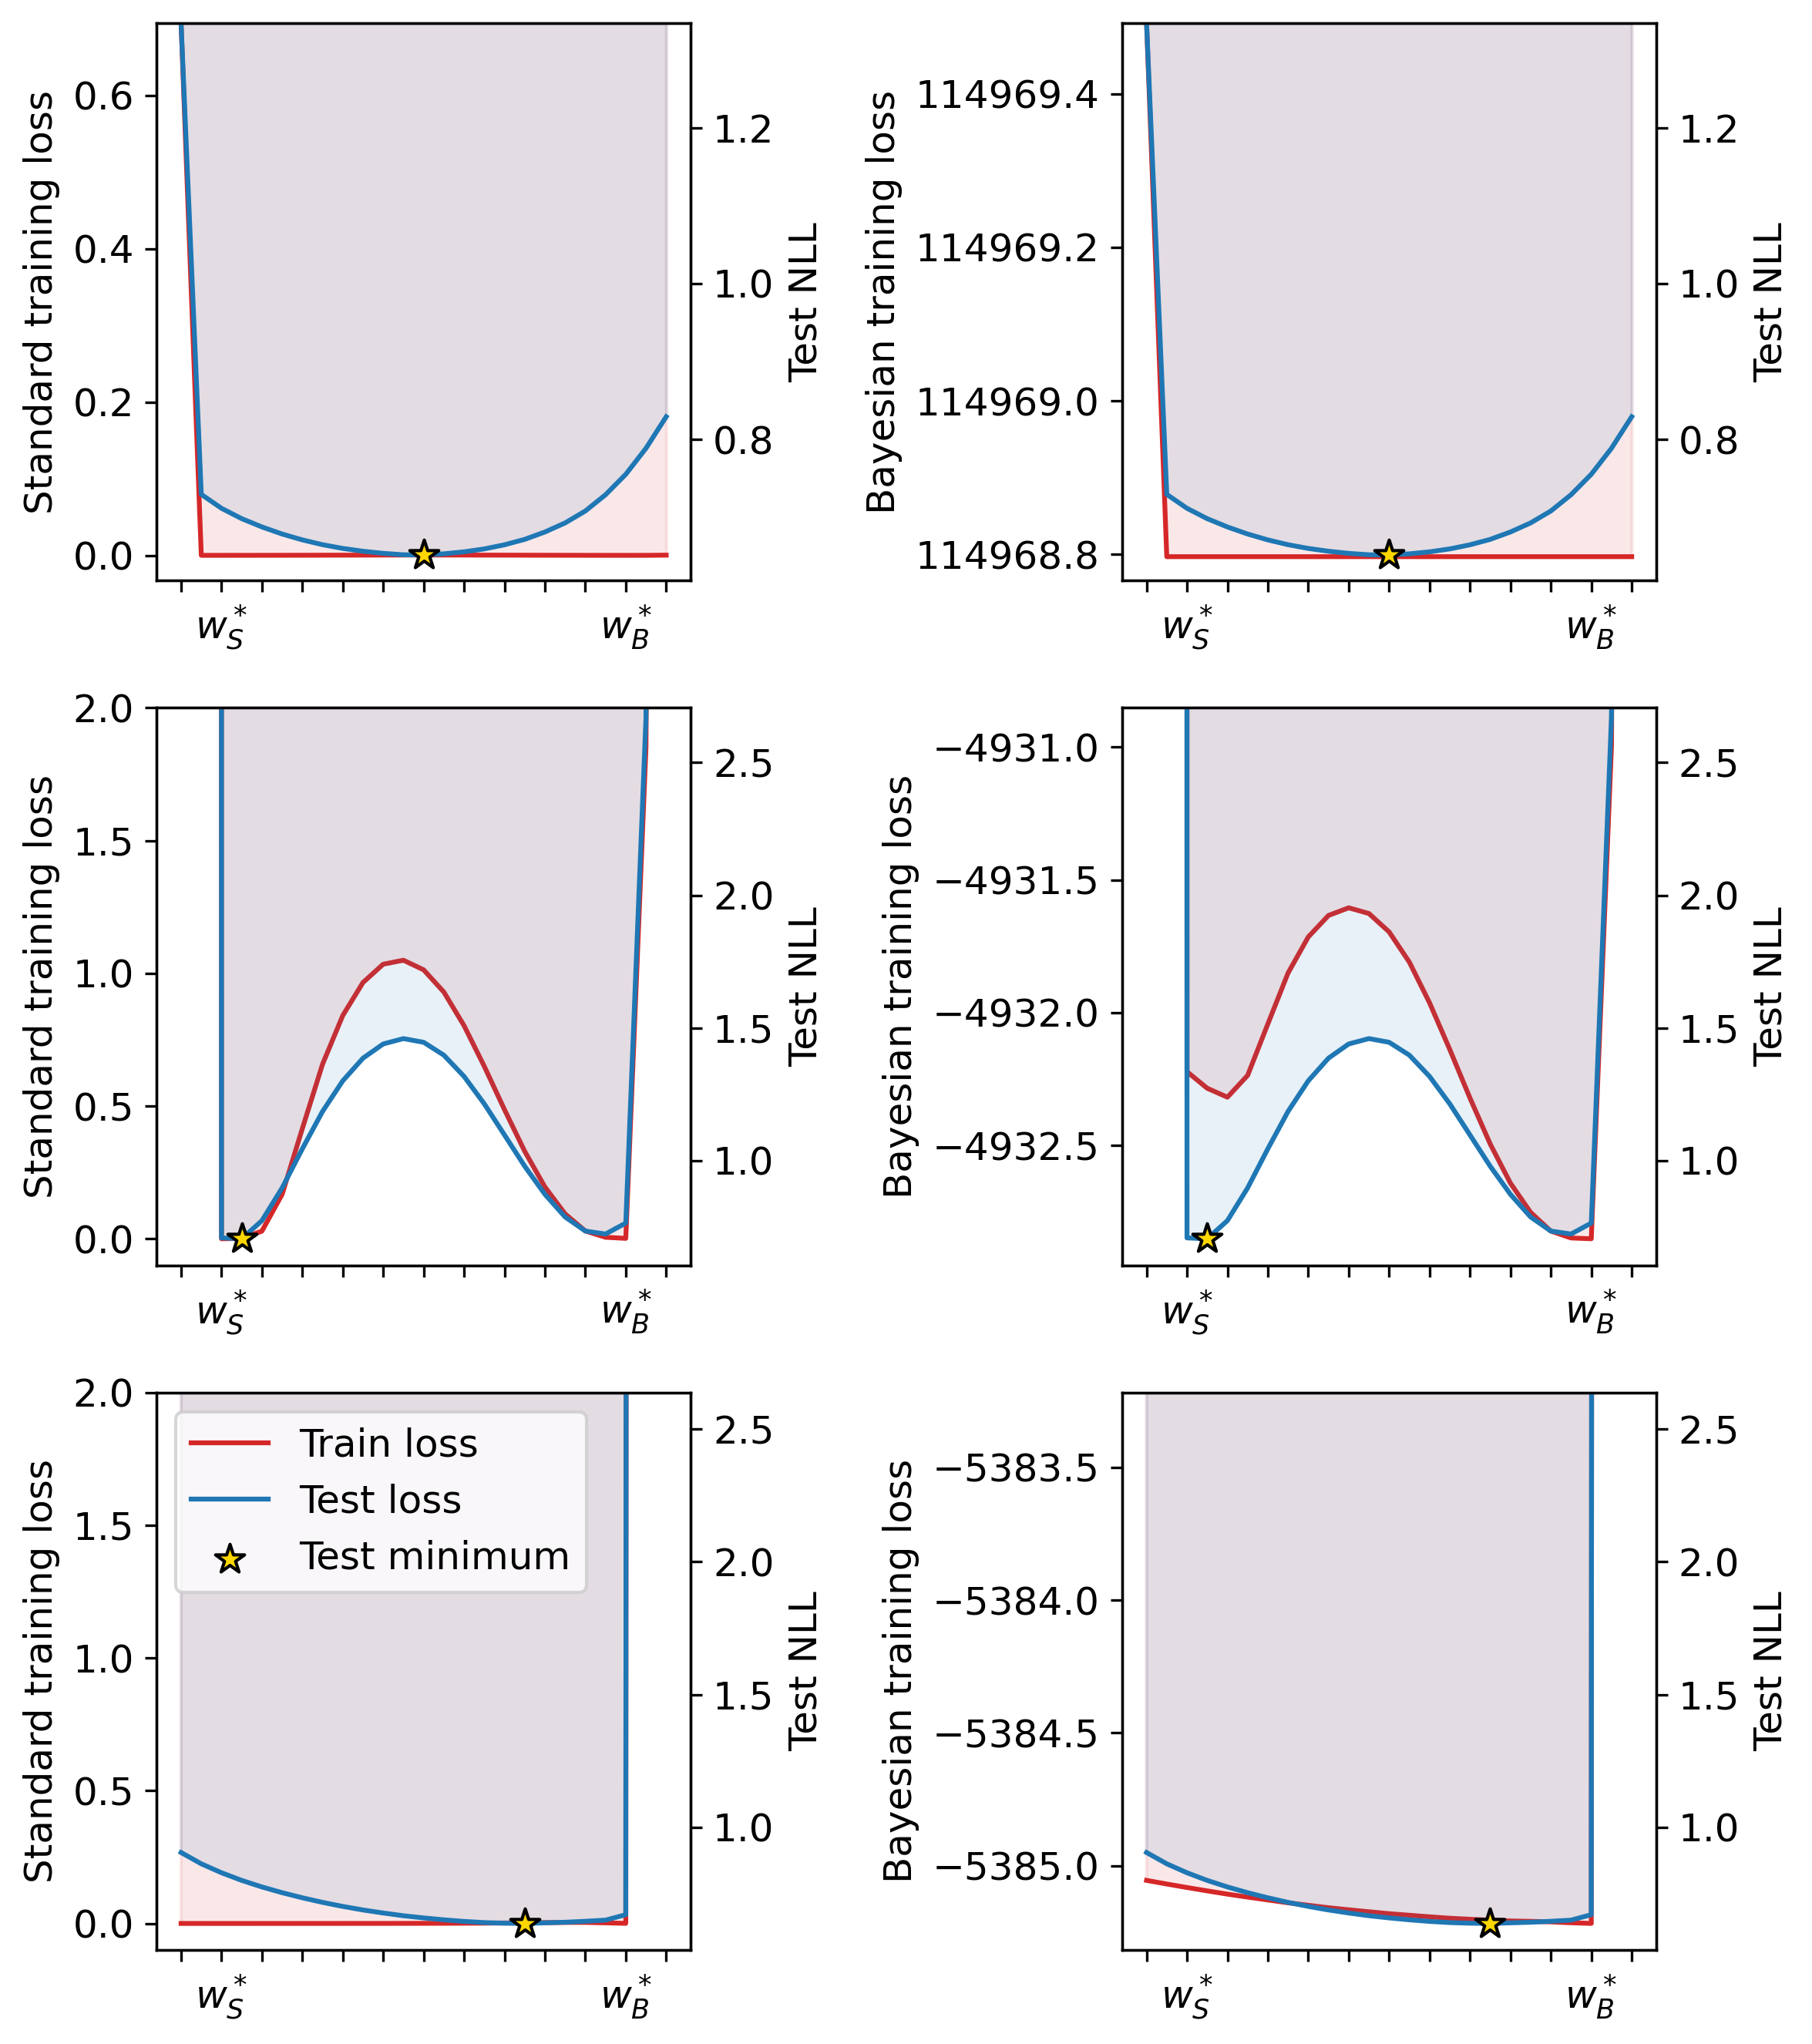

In [4]:
ncols, nrows = 2, 3
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 3*nrows), dpi=300)

for index, (random_state, train_label, test_label, space) in enumerate(zip([1001, 2001, 3001], ['Train loss', None, None], ['Test loss', None, None], [0.033, 0.1, 0.1])):
    
    nonlearned_train_losses = torch.load('./nonlearned_train_interpolation_random_state={}.pth'.format(random_state))
    nonlearned_test_losses = torch.load('./nonlearned_test_interpolation_random_state={}.pth'.format(random_state))
    learned_train_losses = torch.load('./learned_train_interpolation_random_state={}.pth'.format(random_state))
    learned_test_losses = torch.load('./learned_test_interpolation_random_state={}.pth'.format(random_state))

    axs[index,0].plot(range(len(nonlearned_train_losses)), nonlearned_train_losses, color='#d62728', label=train_label)
    axs[index,0].fill_between(range(len(nonlearned_train_losses)), nonlearned_train_losses, torch.max(nonlearned_train_losses), color='#d62728', alpha=0.1)
    twin_axs0 = axs[index,0].twinx()
    twin_axs0.plot(range(len(nonlearned_test_losses)), nonlearned_test_losses, color='#1f77b4', label=test_label)
    twin_axs0.fill_between(range(len(nonlearned_test_losses)), nonlearned_test_losses, torch.max(nonlearned_test_losses), color='#1f77b4', alpha=0.1)
    if index==0: twin_axs0.scatter(np.argmin(learned_test_losses), min(learned_test_losses), color='gold', edgecolors='black' , label='Test minimum', marker='*', s=90, zorder=2)
    else: twin_axs0.scatter(np.argmin(learned_test_losses), min(learned_test_losses), color='gold', edgecolors='black', marker='*', s=90, zorder=2)
    twin_axs0.set_ylim([min(nonlearned_test_losses)-space, min(max(nonlearned_test_losses), min(nonlearned_test_losses)+2)])

    axs[index,1].plot(range(len(learned_train_losses)), learned_train_losses, color='#d62728')
    axs[index,1].fill_between(range(len(learned_train_losses)), learned_train_losses, torch.max(learned_train_losses), color='#d62728', alpha=0.1)
    twin_axs1 = axs[index,1].twinx()
    twin_axs1.plot(range(len(learned_test_losses)), learned_test_losses, color='#1f77b4')
    twin_axs1.fill_between(range(len(learned_test_losses)), learned_test_losses, torch.max(learned_test_losses), color='#1f77b4', alpha=0.1)
    twin_axs1.scatter(np.argmin(learned_test_losses), min(learned_test_losses), color='gold', edgecolors='black', marker='*', s=90, zorder=2)
    twin_axs1.set_ylim([min(learned_test_losses)-space, min(max(learned_test_losses), min(learned_test_losses)+2)])

    axs[index,0].set_xticks(np.linspace(0, 24, num=13))
    axs[index,0].set_xticklabels(['', r'$w_{S}^*$', '', '', '', '', '', '', '', '', '', r'$w_{B}^*$', ''])
    axs[index,0].set_ylim([min(nonlearned_train_losses)-space, min(max(nonlearned_train_losses), min(nonlearned_train_losses)+2)])
    axs[index,0].set_ylabel('Standard training loss')
    twin_axs0.set_ylabel('Test NLL')
    
    axs[index,1].set_xticks(np.linspace(0, 24, num=13))
    axs[index,1].set_xticklabels(['', r'$w_{S}^*$', '', '', '', '', '', '', '', '', '', r'$w_{B}^*$', ''])
    axs[index,1].set_ylim([min(learned_train_losses)-space, min(max(learned_train_losses), min(learned_train_losses)+2)])
    axs[index,1].get_yaxis().get_major_formatter().set_useOffset(False)
    axs[index,1].set_ylabel('Bayesian training loss')
    twin_axs1.set_ylabel('Test NLL')

fig.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=axs[-1,0].transAxes)
fig.tight_layout()    
plt.savefig('interpolations.pdf')
plt.show()

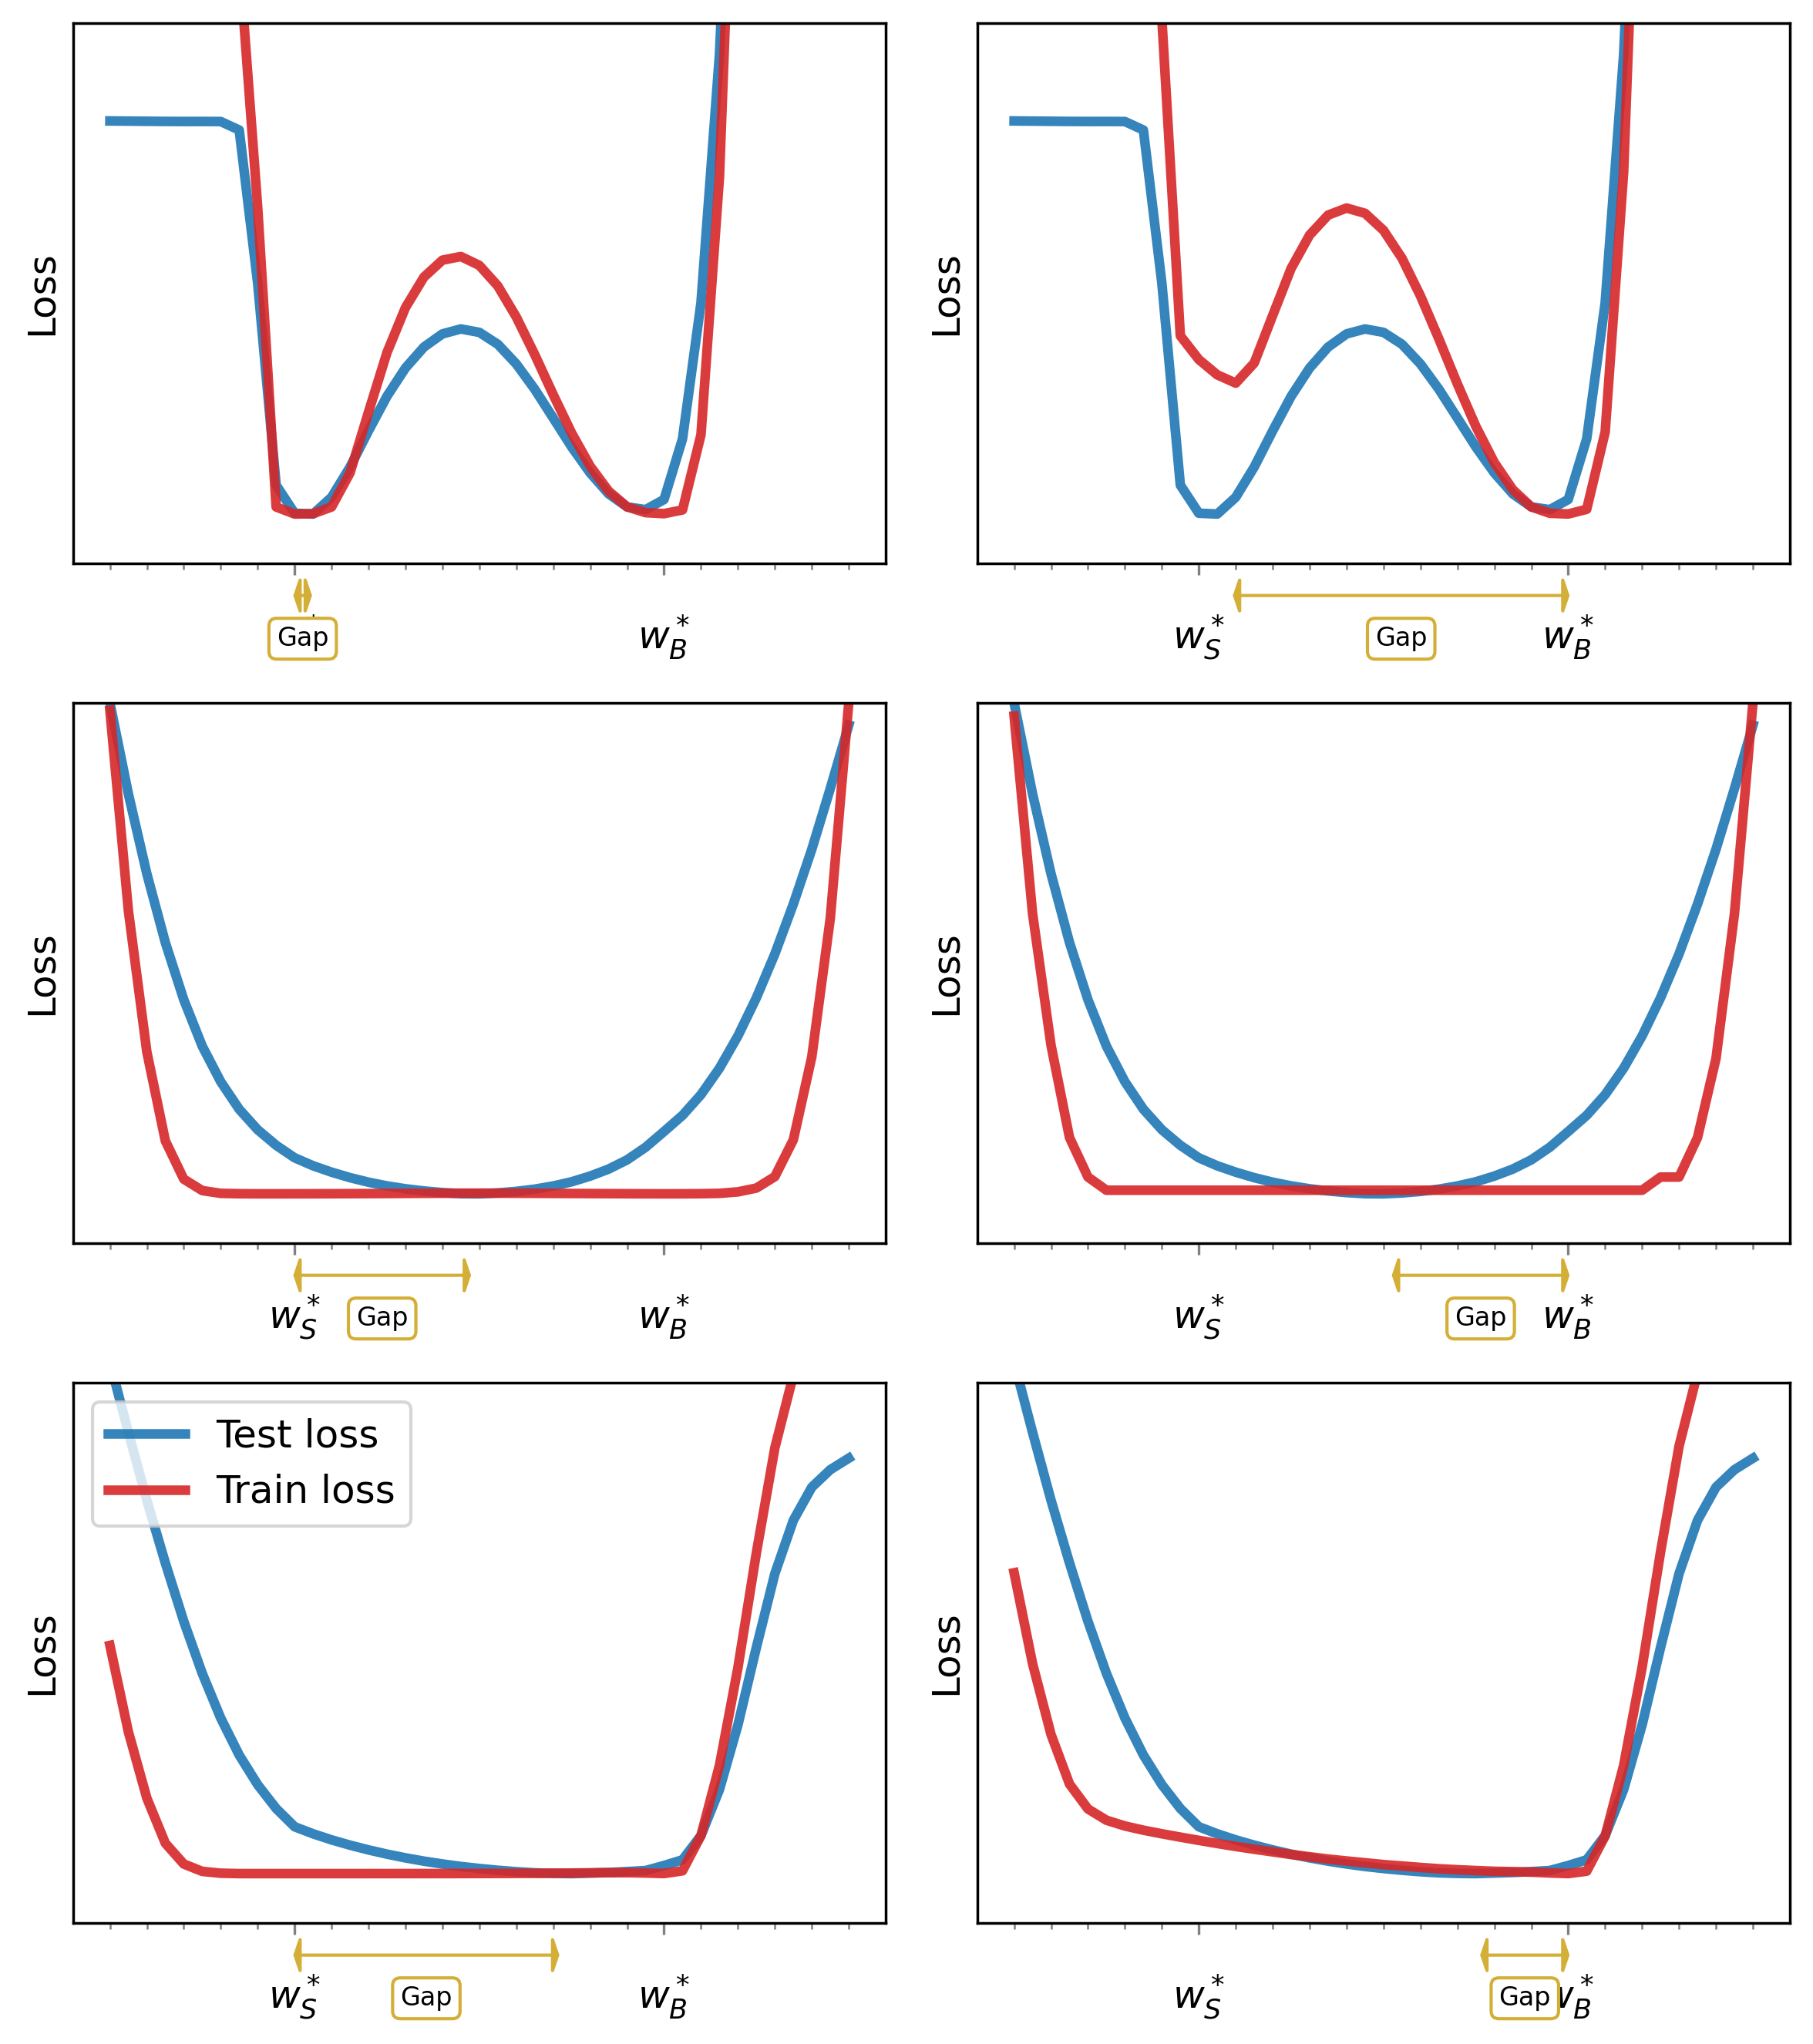

In [117]:
def color_ax(ax, color='gray'):
    ax.spines['bottom'].set_color(color)
    ax.spines['top'].set_color(color)
    ax.spines['left'].set_color(color)
    ax.spines['right'].set_color(color)
    ax.tick_params(which='both', color=color)
    
ncols, nrows = 2, 3
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 3*nrows), dpi=300)

for index, (random_state, train_label, test_label) in enumerate(zip([2001, 1001, 3001], ['Train loss', None, None], ['Test loss', None, None])):
    
    nonlearned_train_losses = torch.load('./nonlearned_train_interpolation_random_state={}.pth'.format(random_state))
    nonlearned_test_losses = torch.load('./nonlearned_test_interpolation_random_state={}.pth'.format(random_state))
    learned_train_losses = torch.load('./learned_train_interpolation_random_state={}.pth'.format(random_state))
    learned_test_losses = torch.load('./learned_test_interpolation_random_state={}.pth'.format(random_state))

    train_height = abs(min(max(nonlearned_train_losses), min(nonlearned_train_losses)+2)-min(nonlearned_train_losses))
    test_height = abs(min(max(nonlearned_test_losses), min(nonlearned_test_losses)+2)-min(nonlearned_test_losses))
    width = 46
    start, end = 12, 34
    
    axs[index,0].plot(range(len(nonlearned_test_losses)), nonlearned_test_losses, alpha=0.9, color='#1f77b4', label=test_label, linewidth=3)
    # Ticks
    axs[index,0].set_xticks([10, 30])
    axs[index,0].set_xticks(np.linspace(0, 40, num=21), minor=True)
    axs[index,0].set_xticklabels([r'$w_{S}^*$', r'$w_{B}^*$'])
    color_ax(axs[index,0])
    axs[index,0].tick_params(axis='x', which='both', pad=12)
    axs[index,0].annotate('', xy=(start/width, -0.06), xycoords='axes fraction', xytext=((np.argmin(nonlearned_test_losses)+3)/width, -0.06), arrowprops=dict(arrowstyle="<|-|>", color='#d4af37', mutation_scale=4, mutation_aspect=6))
    axs[index,0].text((np.argmin(nonlearned_test_losses)+start+3)/(2*width), -0.14, 'Gap', ha='center', va='center', fontsize=8, color='black', bbox=dict(facecolor='white', edgecolor='#d4af37', boxstyle='round,pad=0.3'), transform=axs[index,0].transAxes)
    axs[index,0].set_ylim([min(nonlearned_test_losses)-(test_height/10), min(max(nonlearned_test_losses), min(nonlearned_test_losses)+2)])
    axs[index,0].set_yticks([])
    axs[index,0].set_ylabel('Loss')

    twin_axs0 = axs[index,0].twinx()
    twin_axs0.plot(range(len(nonlearned_train_losses)), nonlearned_train_losses, alpha=0.9, color='#d62728', label=train_label, linewidth=3)
    twin_axs0.set_ylim([min(nonlearned_train_losses)-(train_height/10), min(max(nonlearned_train_losses), min(nonlearned_train_losses)+2)])
    twin_axs0.set_yticks([])

    axs[index,1].plot(range(len(learned_test_losses)), learned_test_losses, alpha=0.9, color='#1f77b4', linewidth=3)
    # Ticks
    axs[index,1].set_xticks([10, 30])
    axs[index,1].set_xticks(np.linspace(0, 40, num=21), minor=True)
    axs[index,1].set_xticklabels([r'$w_{S}^*$', r'$w_{B}^*$'])
    color_ax(axs[index,1])
    axs[index,1].tick_params(axis='x', which='both', pad=12)
    axs[index,1].annotate('', xy=((np.argmin(learned_test_losses)+3)/width, -0.06), xycoords='axes fraction', xytext=(end/width, -0.06), arrowprops=dict(arrowstyle="<|-|>", color='#d4af37', mutation_scale=4, mutation_aspect=6))
    axs[index,1].text((np.argmin(learned_test_losses)+end+3)/(2*width), -0.14, 'Gap', ha='center', va='center', fontsize=8, color='black', bbox=dict(facecolor='white', edgecolor='#d4af37', boxstyle='round,pad=0.3'), transform=axs[index,1].transAxes)
    axs[index,1].set_ylim([min(learned_test_losses)-(test_height/10), min(max(learned_test_losses), min(learned_test_losses)+2)])
    axs[index,1].set_yticks([])
    axs[index,1].set_ylabel('Loss')

    twin_axs1 = axs[index,1].twinx()
    twin_axs1.plot(range(len(learned_train_losses)), learned_train_losses, alpha=0.9, color='#d62728', linewidth=3)
    twin_axs1.set_ylim([min(learned_train_losses)-(train_height/10), min(max(learned_train_losses), min(learned_train_losses)+2)])
    twin_axs1.set_yticks([])
    
fig.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=axs[-1,0].transAxes)
fig.tight_layout()    
plt.savefig('interpolations.pdf')
plt.show()